<a href="https://colab.research.google.com/github/bikumalla/Tensorflow_Deeplearning/blob/main/Tensorflow_Classification_Analysis_Scrapbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs) 
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)


## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |


In [5]:
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

We could start by importing a classification dataset but let's practice making some of our own classification data.

In [6]:
from sklearn import datasets
samples = 1000
X,y = datasets.make_circles(samples,noise = 0.05,random_state=42)

In [7]:
X[:10],y[:10]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556],
        [-0.46988549,  0.70803745],
        [-0.01604538,  0.80562331],
        [ 0.75962295,  0.15952616],
        [-0.17569191, -0.79983689],
        [-0.11061613,  1.04220747]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Lets make into Pandas dataframe and visulaize data


In [8]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


In [9]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

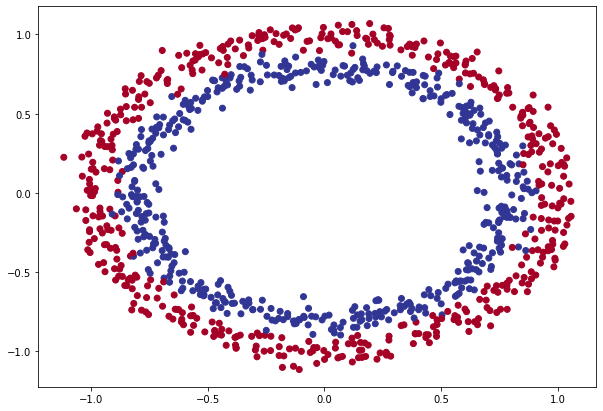

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.RdYlBu)

In [11]:
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
len(X),len(y)

(1000, 1000)

In [13]:
X[0],y[0]

(array([0.74220688, 0.24668576]), 1)

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [14]:
# setting the seed
tf.random.set_seed(42)

# Building the model with sequential api

Classification_model = tf.keras.Sequential([
                                            tf.keras.layers.Dense(1),
                                            tf.keras.layers.Dense(100),
                                            tf.keras.layers.Dense(1)
]) 

# Compiling the model

Classification_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                             optimizer = tf.keras.optimizers.SGD(),
                             metrics = ['accuracy'])

# Fitting the model

Classification_model.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.9349 - accuracy: 0.4580
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4670


In [15]:
Classification_model.fit(X,y,epochs = 200,verbose = 0)
Classification_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000


[0.6946123838424683, 0.5]

In [16]:
tf.random.set_seed(42)

# Adding more layers and see
class_model_2 = tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])


# Compiling the model

class_model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.SGD(),
                      metrics = ['accuracy'])

# fitting the model

class_model_2.fit(X,y,epochs =100,verbose = 0)

class_model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.5000


[0.6986603736877441, 0.5]

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** If you're using TensorFlow 2.7.0+ the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)

In [17]:
# set seed 
tf.random.set_seed(42)

# Building the model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100,input_shape =(None,1)),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1) ])
# Compiling the model 
model_2.compile(
                  loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"] )

# fitting the model     
model_2.fit( X,y,epochs = 100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.2485 - accuracy: 0.4975
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5051
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4899
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4977
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5074
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4966
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4922
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5024
Epoch 11/

In [18]:
X.shape

(1000, 2)

Lets visualize our model's predictions, we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model,X,y):


  # lets make the boundaries of the axis and create the mesh grid

  x_min,x_max = X[:,0].min()-0.01,X[:,0].max()+0.01
  y_min,y_max = X[:,1].min()-0.01,X[:,1].max()+0.01
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))


  # lets create x values
 
  x_in = np.c_[xx.ravel(), yy.ravel()] # 2d flattened array

  # lets make predictions on the trained model
  y_pred = model.predict(x_in)


  # checking for the multiclass
  if len(y_pred[0]) > 1:
    print('Its a multiclass classification')
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
    print('Binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  
  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,c_map = plt.cm.RdYlBu,alpha =0.7)
  plt.scatter(X[:,0],X[:,1],c = y ,s = 40,cmap =plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



Its a multiclass classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


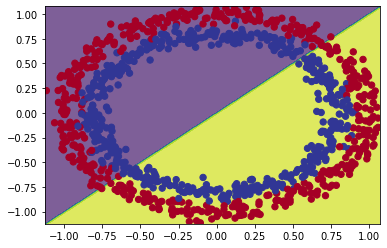

In [20]:
plot_decision_boundary(model_2,X,y)

In [21]:
import numpy as np
x_min,x_max = X[ : , 0].min() - 0.01, X[ : , 0].max() + 0.01
y_min,y_max = X[ : , 1].min() - 0.01, X[ : , 1 ].max() + 0.01
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

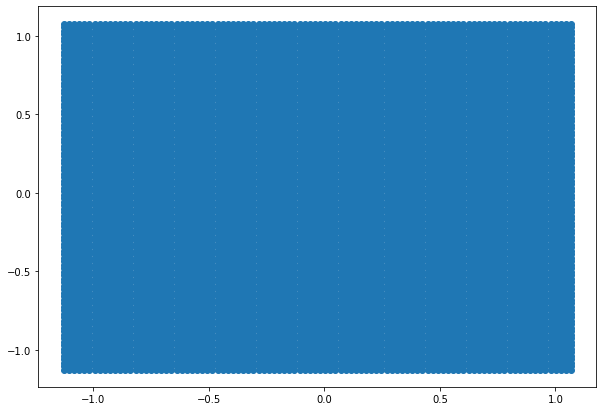

In [22]:
plt.figure(figsize= (10,7))
plt.scatter(xx,yy)

In [23]:
# Lets build a model with activation function

# setting the random seed
tf.random.set_seed(42)


# Building the model with activation function
model_linact = tf.keras.Sequential([
                                    tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
                                    tf.keras.layers.Dense(1)
])


# Compiling the model 

model_linact.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

history = model_linact.fit(X,y,epochs =100,verbose = 0)



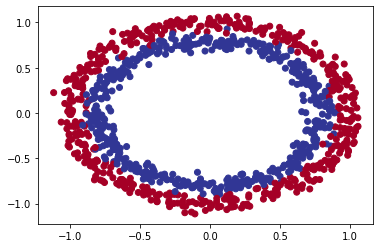

In [24]:
plt.scatter(X[:,0],X[:,1],c = y ,cmap= plt.cm.RdYlBu)

Binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


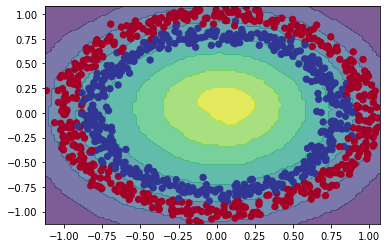

In [25]:
plot_decision_boundary(model_linact,X,y)

In [26]:
tf.random.set_seed(42)

#lets build with 2 activation layers

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['Accuracy'])

model_5.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - Accuracy: 0.5000
Epoch 11/

Binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


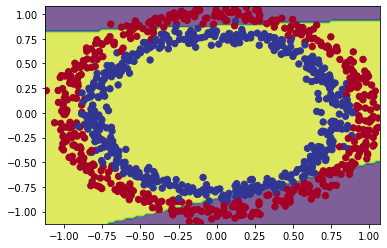

In [27]:
plot_decision_boundary(model_5,X,y)

In [28]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_7.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5130
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5440
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5400
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5520
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5520
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5520
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5530
Epoch 11/

Binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


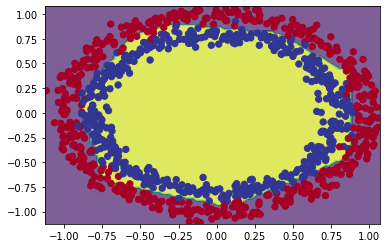

In [29]:
plot_decision_boundary(model_7,X,y)

In [30]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

In [31]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10,activation = "relu"),
                               tf.keras.layers.Dense(10,activation = "relu"),
                               tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_9.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_9.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5340
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5560
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5630
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5730
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5700
Epoch 11/

In [32]:
model_9.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9750


[0.08966905623674393, 0.9750000238418579]

Binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


Binary classification


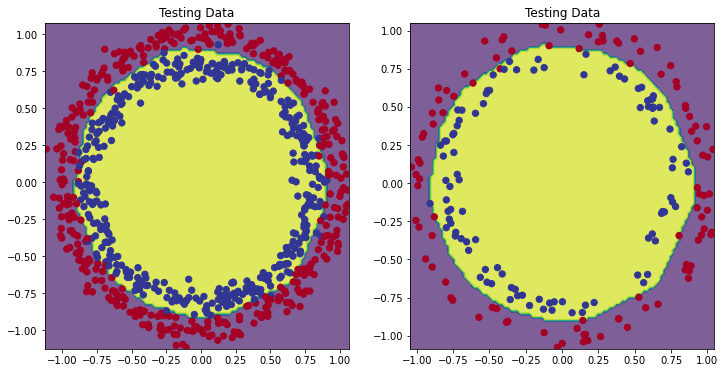

In [33]:
plt.figure(figsize= (12,6))

plt.subplot(1,2,1)

plt.title("Testing Data")

plot_decision_boundary(model_9,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Testing Data")

plot_decision_boundary(model_9,X_test,y_test)

plt.show();

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

You might've seen we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [34]:
pd.DataFrame(history.history)

,loss,accuracy
0,1.203707,0.469
1,0.802914,0.363
2,0.772037,0.369
3,0.752929,0.286
4,0.740899,0.313
...,...,...
95,0.113107,0.970
96,0.109463,0.974
97,0.106837,0.971
98,0.107478,0.975


Text(0.5, 1.0, 'Model Loss and accuracy curve')

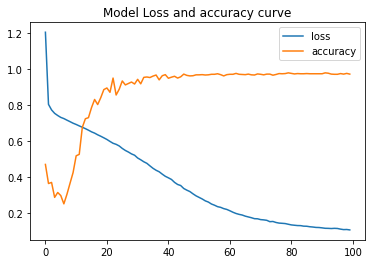

In [35]:
pd.DataFrame(history.history).plot()
plt.title('Model Loss and accuracy curve')

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.


I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [36]:
# Set random seed
tf.random.set_seed(42)

#Building the model

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,activation = "relu"),
                                tf.keras.layers.Dense(10,activation ="relu"),
                                tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_10.compile( loss =tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history = model_10.fit(X_train,
             y_train,
             epochs = 100,
             callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

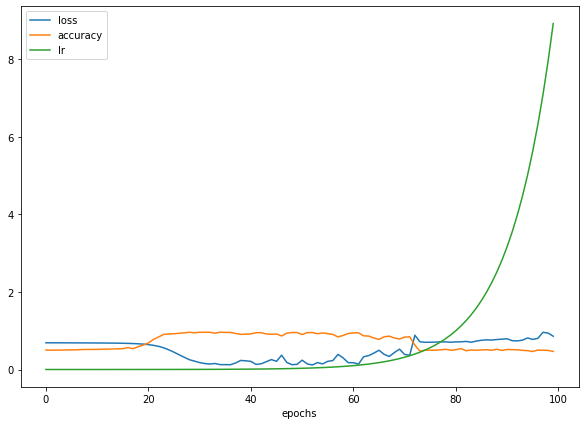

In [37]:
from IPython.core.pylabtools import figsize
pd.DataFrame(history.history).plot(figsize(10,7),xlabel = 'epochs')

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'Learning Rate vs Loss')

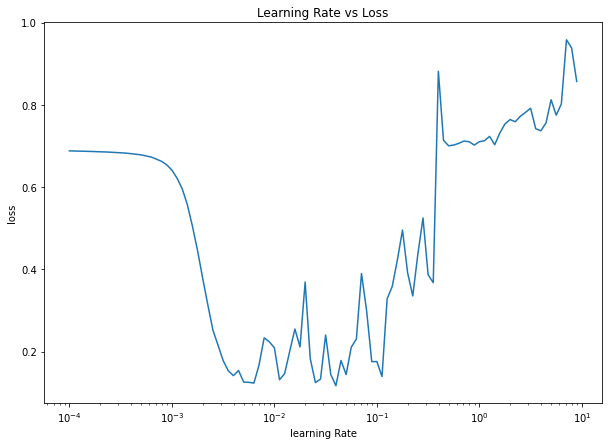

In [38]:
lrs = 1e-4 * ( 10** (np.arange(100)/20))
plt.figure(figsize= (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel('learning Rate')
plt.ylabel('loss')
plt.title('Learning Rate vs Loss')

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

In [39]:
# lets try out the same model with lr 0.02
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,activation = "relu"),
                                tf.keras.layers.Dense(10,activation = "relu"),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_11.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = 'accuracy')

history = model_11.fit(X_train,y_train,epochs = 11)

Epoch 1/11
25/25 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.5188
Epoch 2/11
25/25 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6288
Epoch 3/11
25/25 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.8138
Epoch 4/11
25/25 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8712
Epoch 5/11
25/25 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.9300
Epoch 6/11
25/25 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9225
Epoch 7/11
25/25 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9400
Epoch 8/11
25/25 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9325
Epoch 9/11
25/25 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9362
Epoch 10/11
25/25 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9375
Epoch 11/11
25/25 [

In [40]:
model_11.evaluate(X_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9625


[0.10978896170854568, 0.9624999761581421]

Binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'


Binary classification


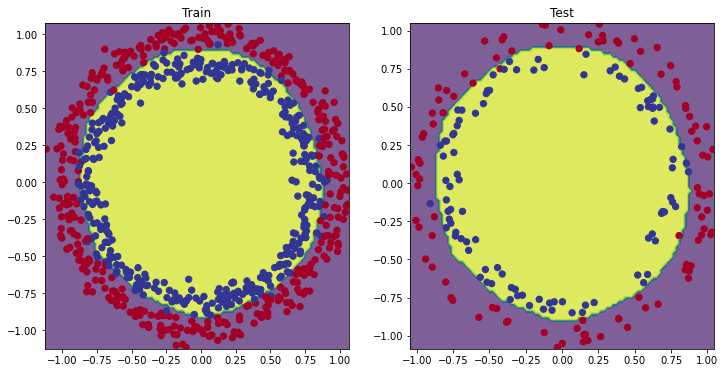

In [41]:
plt.figure(figsize= (12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_11,X_train,y_train)

plt.subplot(1,2,2)

plt.title('Test')
plot_decision_boundary(model_11,X_test,y_test)

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [42]:
y_preds = model_11.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

# need to round the predictions as we are getting contineous numbers
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 4, 95]])

In [44]:
y_preds.round

<function ndarray.round>

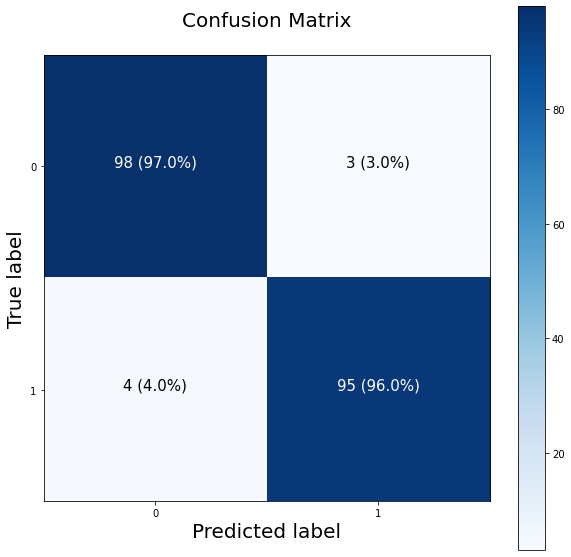

In [45]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# Training and testing data
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
print(f"first training sample :\n {train_data[0]}")
print(f"first training label :{train_labels[0]}")

first training sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

In [48]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [49]:
train_data[0].shape

(28, 28)

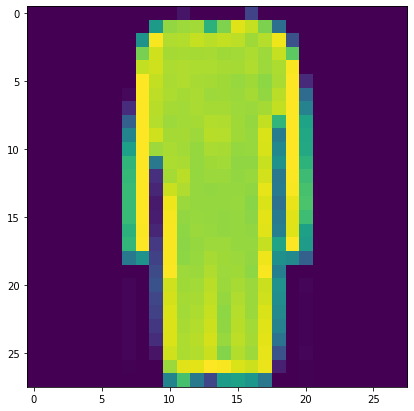

In [50]:
import matplotlib.pyplot as plt
plt.imshow(train_data[25])


It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

> 🔑 **Note:** Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

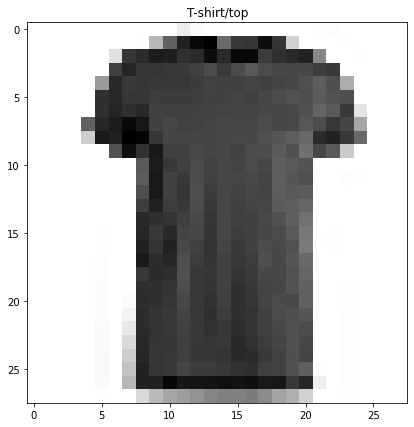

In [52]:
plt.imshow(train_data[17],cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

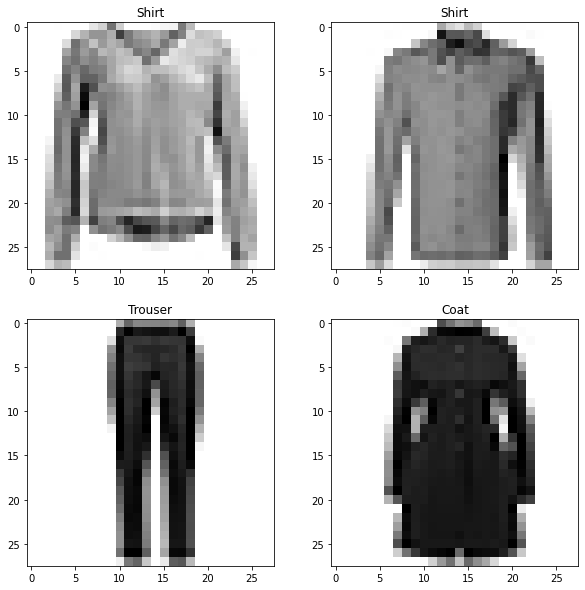

In [53]:
# lets plot multiple random images

import random 
plt.figure(figsize=(10,10))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  
  

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function. 
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [54]:
# Setting random seed
tf.random.set_seed(42)

# Building model for multiclass classification
class_model = tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape = (28,28)), # input layer need to be flattned as the shape is 28*28 need to make 784
                                   tf.keras.layers.Dense(4,activation = 'relu'),
                                   tf.keras.layers.Dense(4,activation = 'relu'),
                                   tf.keras.layers.Dense(10,activation = 'softmax') # no. of classifications and output activation
])

class_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Different loss function for the  muliclass classfication
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

non_norm_history = class_model.fit(train_data,
                train_labels,
                epochs = 10,
                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [55]:
class_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `non_norm_history` variable when calling `fit()`). It's pixel values are between 0 and 255.

Let's see.

In [56]:
train_data = train_data/255
test_data = test_data/255

In [57]:
# Set Random seed 
tf.random.set_seed(42)

#Build classmodel
multi_class_model = tf.keras.Sequential([
                                         tf.keras.layers.Flatten(input_shape = (28,28)),
                                         tf.keras.layers.Dense(10,activation = 'relu'),
                                         tf.keras.layers.Dense(10,activation = 'relu'),
                                         tf.keras.layers.Dense(10,activation = 'softmax')
])

multi_class_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['accuracy'],
                         
                           )

norm_history = multi_class_model.fit(train_data,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7175 - accuracy: 0.7461
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4600 - accuracy: 0.8387
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4300 - accuracy: 0.8481
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8551
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8580
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8602
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8632
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3818 - accuracy: 0.8650
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8661
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.373

Lets plot the history curves to see loss vs learning rate

<Figure size 864x432 with 0 Axes>

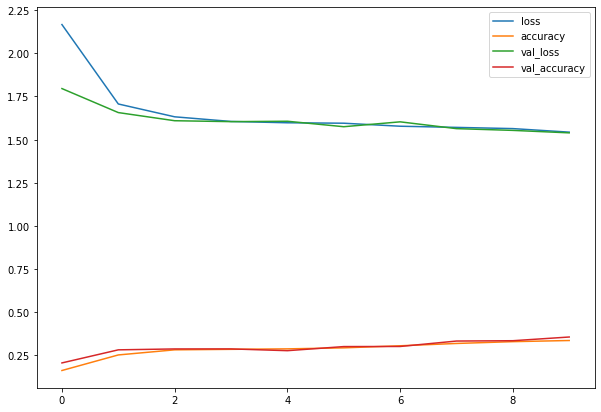

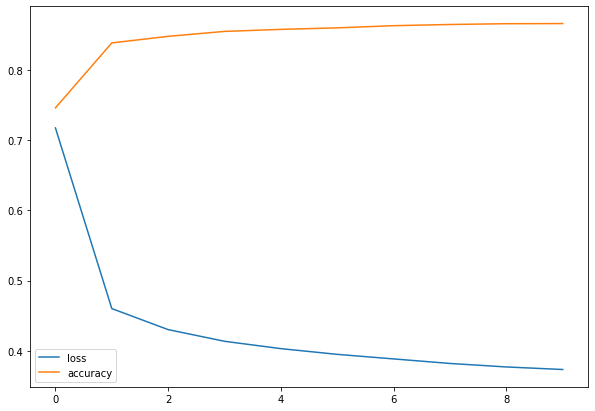

In [58]:
plt.figure(figsize=(12,6))


pd.DataFrame(non_norm_history.history).plot()

pd.DataFrame(norm_history.history).plot()

In [59]:
from sklearn.utils import validation
from gc import callbacks
#lets do the lr schedule mode
# setting the random seed
tf.random.set_seed(42)

# Building the model
model_hist_normal = tf.keras.Sequential([
                                         tf.keras.layers.Flatten(input_shape = (28,28)),
                                         tf.keras.layers.Dense(4,activation='relu'),
                                         tf.keras.layers.Dense(4,activation = 'relu'),
                                         tf.keras.layers.Dense(10,activation = 'sigmoid')
])

# compiling the model
model_hist_normal.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

lr_history = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
# fititng the model
history_model =  model_hist_normal.fit(train_data,
                                       train_labels,
                                       epochs = 40, 
                                       validation_data = (test_data,test_labels),
                                       callbacks =[lr_history] )

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

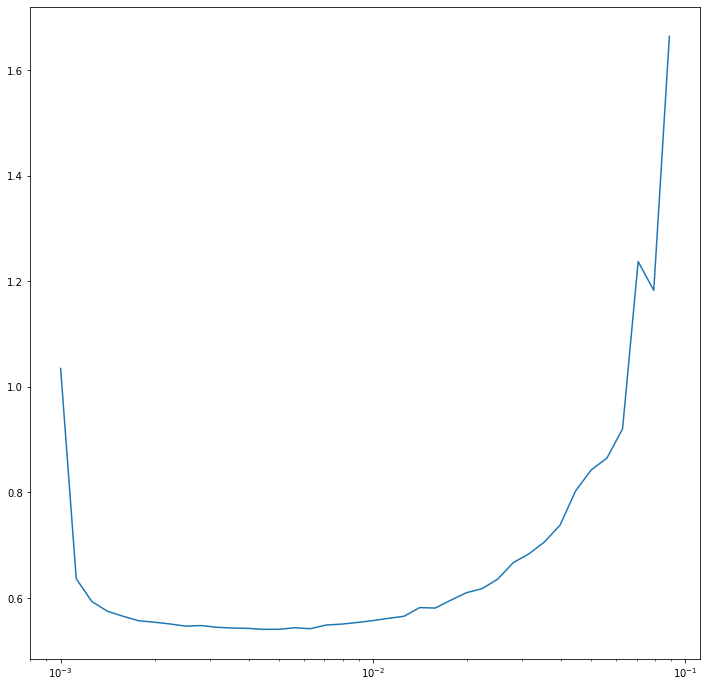

In [60]:
plt.figure(figsize= (12,12))
lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs,history_model.history["loss"])

In [61]:
# lets model with the best learing rate now
tf.random.set_seed(42)

# lets model with best lr
model_best_lr = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(4,activation = 'relu'),
                                     tf.keras.layers.Dense(4,activation = 'relu'),
                                     tf.keras.layers.Dense(10,activation = 'sigmoid')

])

model_best_lr.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(0.001),
                      metrics = ["accuracy"])

best_lr_history = model_best_lr.fit(train_data,train_labels,epochs = 40 , validation_data = [test_data,test_labels])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [62]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools
from sklearn.metrics import confusion_matrix

# lets make a function to do the confusion matrix

def make_confusion_matrix(y_true,y_pred,classes = None,figsize = (10,10),text_size = 15):
  
  """ Make a labelled confusion matrix comparing the ground truth with predictions

  If classes is passed, confustion matrix  will be labeled else  it will use integers 
  
  Args :
    y_true = Array of Ground truth labels of the test data
    y_pred = Array of prediction labels from the model
    classes = Array of class names (If None) Integer labels will be used
    figsize = size of the output figure size defaulted to 10,10 
    text_size = size of the output text_size is defualted to 15 can be changed 


  Returns :
     A labelled confusion matrix that is plotted between truth labels and predictions
     
     Example usage 
     make_confusion_matrix(
                           y_true = test_labels # 
                           y_pred = yhats
                           classes = classnames # if None integers will be used
                           figsize = (15,15
                           text_size = 10

     ) 
     
     """


  # Create Confusion matrix 
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis= 1)[:,np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we are dealing with

  # plot the figure pretty
  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap = plt.cm.Blues) # colors will represent as
  fig.colorbar(cax)

  # Are there multiple classes
  if classes :
    labels = classes

  else :
    labels = np.arange(cm.shape[0])

  #label the axis
  ax.set(title = 'Confusion Matrix',
         xlabel = 'Predicted labels',
         ylabel = 'True labels',
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)
  
  # make xaxis label at the bottom

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom

  # Set the threshold for the different colors
  threshold = (cm.max() + cm.min())/2

  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment = "center",
             color = "white" if cm[i,j] > threshold else "black",
             size = text_size)
    
             














In [63]:
yprobs = model_best_lr.predict(test_data)
yprobs[:5]

array([[1.0414758e-06, 5.0054069e-07, 7.8829944e-02, 2.9800832e-03,
        9.5445573e-02, 9.9942243e-01, 2.4461746e-04, 9.9610138e-01,
        9.5914143e-01, 9.9973798e-01],
       [2.0066500e-03, 4.5867901e-14, 9.9101704e-01, 8.8649256e-05,
        7.5039089e-01, 5.0471127e-15, 8.9139152e-01, 7.6363018e-37,
        5.1044703e-02, 2.1579166e-13],
       [6.2319422e-01, 9.9997377e-01, 4.0357113e-03, 9.8198152e-01,
        3.7136704e-01, 2.6381362e-17, 2.1965343e-01, 4.6905283e-12,
        2.0163059e-03, 2.3098119e-07],
       [1.9567534e-01, 9.9982262e-01, 4.0322542e-03, 9.4840986e-01,
        4.0247357e-01, 1.2241511e-15, 1.0358238e-01, 2.8491934e-10,
        3.4795105e-03, 6.4495148e-06],
       [7.5755584e-01, 5.0814971e-05, 7.3846787e-01, 1.7762187e-01,
        4.1353494e-01, 9.6690988e-17, 9.3478137e-01, 5.8376318e-28,
        1.0455579e-02, 3.4431485e-13]], dtype=float32)

In [64]:
yprobs[0].argmax()

9

In [65]:
ypreds = yprobs.argmax(axis = 1)

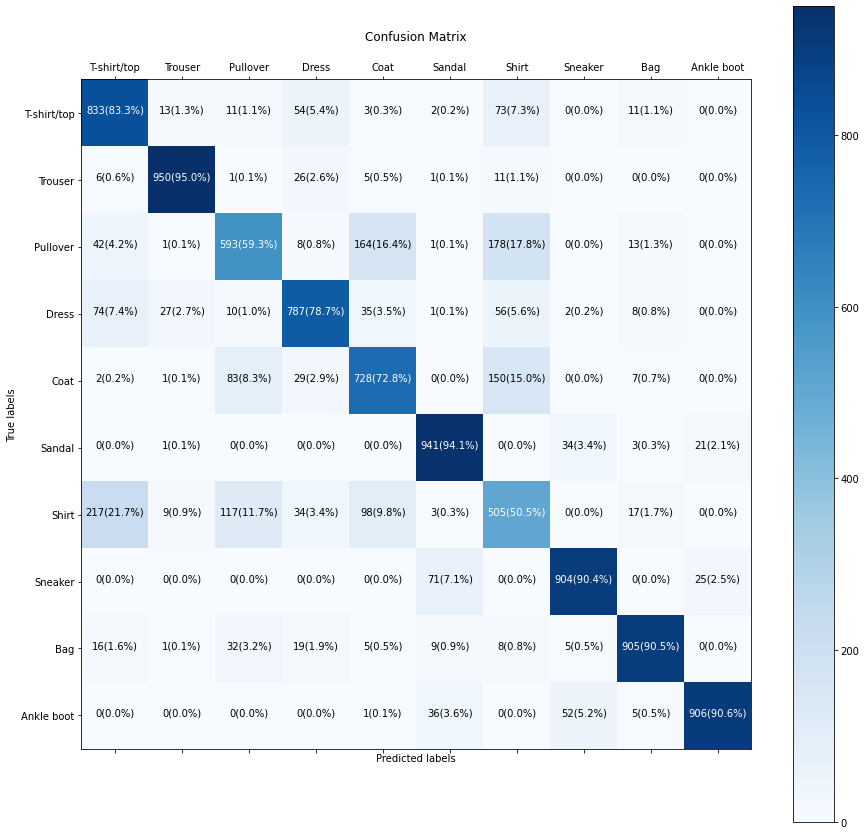

In [66]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = ypreds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size= 10
                      )

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [67]:
# lets make a function to plot the random image

import random

def plot_random_img(model,images,true_labels,classes):

  """
     This function picks the random image,plot it with true and the predicted label.

        Args:
         model : a trained model (trained on data that is similar to whats in images)
         images: a set of random images(in the form of tensor)
         true_labels:array of ground truth labels of the image
         classes: array of the class names of the image

        Returns:
          A plot of random images form images with the predicted class of the model 
          with the ground truth of the model

  """

  # lets get a random value

  i = random.randint(0,len(images))
  
  # create preidictios and targets

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28)) # have to reshape to the right size of the model
  true_label = classes[true_labels[i]]
  pred_label = classes[pred_probs.argmax()]


  # Plot the target image 

  plt.imshow(target_image,cmap =plt.cm.binary)

  # Lets change the title by comparing  true vs pred

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'


  # Adding the xlabel information

  plt.xlabel("Pred label : {} {:2.0f}%  True label {}".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color = color)


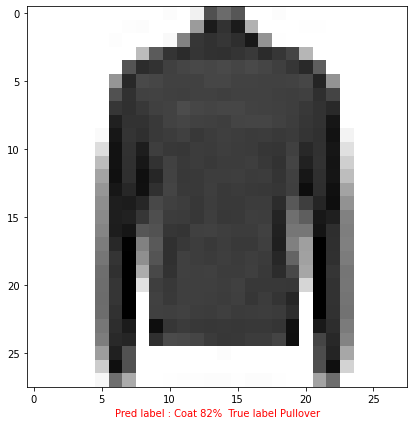

In [71]:
plot_random_img(model_best_lr,test_data,test_labels,class_names)

In [72]:
model_best_lr.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [78]:
weights,biases = model_best_lr.layers[1].get_weights()

In [80]:
weights,weights.shape

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))

In [81]:
biases,biases.shape

(array([ 0.3281791 , -0.01041772, -0.1584291 ,  1.2009073 ], dtype=float32),
 (4,))

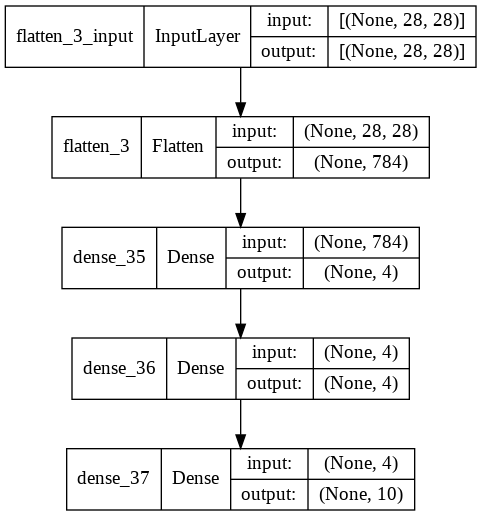

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(model_best_lr,show_shapes= True)